<a href="https://colab.research.google.com/github/ju-mk/police_ri/blob/main/police_ri_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset = Traffic stops by police officers at openpolicing.stanford.edu





PREPARING THE DATA FOR ANALYSIS  
  
Introduction to the dataset

In [1]:
#1 Loading the data

import pandas as pd
ri = pd.read_csv("https://github.com/ju-mk/police_ri/releases/download/csv/ri_statewide_2020_04_01.csv") #the csv file was bigger than 25mb, so had to create a release on github

#2 Examining the data
ri.head(3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [2]:
weather=pd.read_csv("https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv")
ri2=pd.read_csv("https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv")

ri2.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
#3 Locating missing values
ri2.isnull().head(3) #get the dt with True and False for each individual value
print(ri2.isnull().sum()) #get the amount of missing values #compare it to ri.shape to see if all col values are null
print(ri2.shape)

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
(91741, 15)


In [4]:
#4 Dropping a col (useful if a whole col is null)
ri2.drop('county_name', axis = 'columns', inplace = True)
#to do that to more than one col, use brackets eg (['county_name, 'violation'], axis = 'columns', inplace=True)
ri2.shape

(91741, 14)

In [5]:
#5 Dropping rows (useful if a row has null values for the col you're analysing)
#ri2.dropna(subset=['date', 'outcome'], inplace = True)
#ri2.shape

Using data types

In [6]:
#6 Examining the data types
ri2.dtypes


#Object or ‘0’ : python strings (or other Python objects)
#bool: True and False values – enables logical and mathematical operations
#int, float – enables mathematical operations
#datetime – enables date-based attributes and methods
#category – uses less memory and runs faster


state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [7]:
#7 Fixing a data type

#Check the type first
ri2.driver_gender.dtype
#OR
ri2['driver_gender'].dtype


#Then change it using .astype()
ri2['driver_gender'] = ri2.driver_gender.astype('category') #before the equals sign, you cannot use the dot notation (apple.price), only the bracket notation (apple[‘price’])

ri2.driver_gender.dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

Creating a datetimeIndex

In [8]:
#8 Combining object columns (cols date and time are stored in separate cols)

#Change the data to how it should look like
#string methods are available through the str acessor
#e.g. apple has date column in format 2/13/18, but we need to change it to 2-13-18 using apple.date.str.replace('/', '-')

#now, combine the cols using str.cat() (concatenate method)
combined = ri2.stop_date.str.cat(ri2.stop_time, sep =' ')

combined.head() #dtype is still object


0    2005-01-04 12:55
1    2005-01-23 23:15
2    2005-02-17 04:15
3    2005-02-20 17:15
4    2005-02-24 01:20
Name: stop_date, dtype: object

In [9]:
#9 Converting to a datetime format = using the .to_datetime() function and saving it into a new col
ri2['date_time'] = pd.to_datetime(combined) #you don't even need to specify that the original data was in m-d-y format, pandas just figures it out.
ri2.date_time.head()

0   2005-01-04 12:55:00
1   2005-01-23 23:15:00
2   2005-02-17 04:15:00
3   2005-02-20 17:15:00
4   2005-02-24 01:20:00
Name: date_time, dtype: datetime64[ns]

In [10]:
#10 Setting it as the index using the set_index() method (it makes it easier to filter the df by date, plot the data by date, etc)
ri2.set_index('date_time', inplace=True) #>>>the operation should occur in place to avoid an assignment statement


In [11]:
#Now, the default index has been replaced with the datetime column
#Now, if you call for ri2.index it shows DateTimeIndex([…]) * If an existing column becomes the index, it is no longer considered to be one of the dataframe columns
ri2.index


DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='date_time', length=91741, freq=None)

EXPLORING THE RELATIONSHIP BETWEEN GENDER AND POLICING
  
Do the genders commit different violations?

In [12]:
#value_counts() counts the unique values in a series; best suited for categorical data rather than numerical
ri2.stop_outcome.value_counts()


Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [13]:
print(ri2.stop_outcome.value_counts().sum()) 
#it will get the sum of this series, should be actually equal to the number of rows sseen by ri.shape, if there are no missing values
print(ri2.shape)

86539
(91741, 14)


In [16]:
ri2.stop_outcome.value_counts(normalize=True)
#it will output the proportions instead of counts

Citation            0.890835
Warning             0.059361
Arrest Driver       0.031604
No Action           0.007222
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

Does race play a factor into the number of arrests?

In [17]:
#to rename cols
#ri2.rename(columns = {'subject_race':'driver_race'}, inplace = True)

ri2.driver_race.value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

In [18]:
white = ri2[ri2.driver_race=='White'] #creating a new df just with a specific race
white.shape #it shows only the amount of rows corresponding to white drivers

(61872, 14)

In [20]:
white.stop_outcome.value_counts(normalize=True)

Citation            0.902234
Warning             0.057522
Arrest Driver       0.024017
No Action           0.007047
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [22]:
black = ri2[ri2.driver_race=='Black']
black.stop_outcome.value_counts(normalize=True)

Citation            0.857224
Warning             0.065120
Arrest Driver       0.054294
N/D                 0.008547
Arrest Passenger    0.008303
No Action           0.006512
Name: stop_outcome, dtype: float64

Does gender play a role into the number of arrests?

In [27]:
# Filtering a df by multiple conditions
#e.g. female drivers and only thos who have been arrested
# AND is &, OR is |
#each condiiton is surrounded by parenthesis

female_and_arrested = ri2[(ri2.driver_gender == 'F') & (ri2.is_arrested == True)]
print(female_and_arrested.shape)



(669, 14)


In [28]:
female_or_arrested = ri2[(ri2.driver_gender == 'F') | (ri2.is_arrested == True)]

print(female_or_arrested.shape) 
#this df is way larger than the previous one because it includes all females regardless of them being arrested, as well as drivers regardless of them being female.

(26183, 14)


USEFUL PANDAS TECHNIQUES
  
Math with Boolean values(True = 1, False = 0)

In [29]:
import numpy as np #because you're working with lists

# Mean of boolean series represents a percentage of True values
np.mean([0,1,0,0])
np.mean([False, True, False, False]) #the same as the one before

0.25

In [30]:
ri2.is_arrested.value_counts(normalize=True) #calculating the percentage of stops that result in arrest

False    0.964432
True     0.035568
Name: is_arrested, dtype: float64

In [31]:
ri2.is_arrested.mean() #calculates the percentage of True values
#the same as before, but it only works because the data type is boolean, that's why checking the data type at the beginning is so important

0.03556777868937704

In [32]:
ri2.search_conducted.mean()

0.03604713268876511

In [33]:
#calculating the search rate for female drivers
ri2[ri2.driver_gender=='F'].search_conducted.mean()

0.019180617481282074

In [34]:
#calculating the search rate for male drivers
ri2[ri2.driver_gender=='M'].search_conducted.mean()

0.04542557598546892

In [37]:
#The same results as before but given by only one command
ri2.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [38]:
#different types of violation
ri2.violation.head()

date_time
2005-01-04 12:55:00    Equipment
2005-01-23 23:15:00     Speeding
2005-02-17 04:15:00     Speeding
2005-02-20 17:15:00        Other
2005-02-24 01:20:00     Speeding
Name: violation, dtype: object

In [39]:
#types of violation according to gender
print(ri2.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [41]:
#same as before, but in a nicer looking way
ri2.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

Does gender affect who is frisked during a search?
  
* The search_conducted field is True if there is a search during  a traffic stop, and False otherwise.

In [42]:
ri2.search_type.value_counts(dropna=False)

NaN                                                         88434
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

Comparing frisk rates by gender

In [50]:
#Creating a df of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk_performed.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('subject_sex').frisk_performed.mean())

0.5248282851030289
subject_sex
female    0.437983
male      0.538783
Name: frisk_performed, dtype: float64


Calculating and plotting the hourly arrest rate

In [60]:
ri2.columns
ri2.dtypes

#joining stop_date and stop_time to the same column
ri2.stop_date.str.replace('/', '-') #not sure if this step is really necessary, probably not
combined = ri2.stop_date.str.cat(ri2.stop_time, sep=' ')
combined.head
#changing the type from object to datetime
ri2["date_and_time"] = pd.to_datetime(combined)
ri2.dtypes
#setting date_and_time as the index
ri2.set_index('date_and_time', inplace=True)
ri2.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='date_and_time', length=91741, freq=None)

0.03556777868937704
date_and_time
0     0.051420
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038186
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047582
Name: is_arrested, dtype: float64


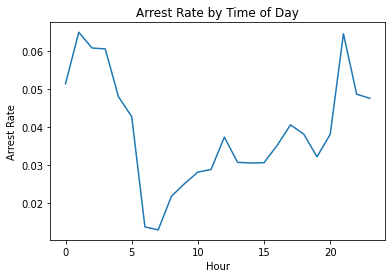

In [63]:
# Calculate the overall arrest rate
print(ri2.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri2.groupby(ri2.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri2.groupby(ri2.index.hour).is_arrested.mean()

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

#Peak at night, drop in early morning hours.

Plotting drug related stops

date_and_time
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


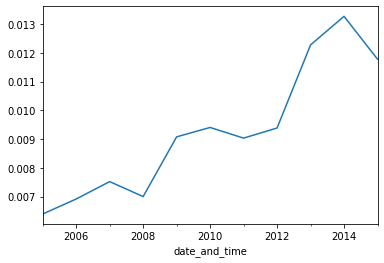

In [69]:
# Calculate the annual rate of drug-related stops
#print(ri2.drugs_related_stop.groupby(ri2.index.year).mean()) OR
print(ri2.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri2.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()


We've seen that the amount of drug-related stops have nearly doubled in the last few years.
Is it because more searches have been done?

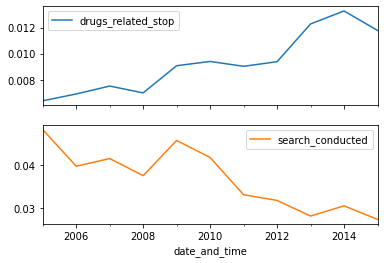

In [71]:
# Calculate and save the annual search rate
annual_search_rate = ri2.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

Now we can see that the rate of drug-related stops have actually increased even though the search rate decreased, disproving our hypothesis.

**Tallying and plotting violations per district**



violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

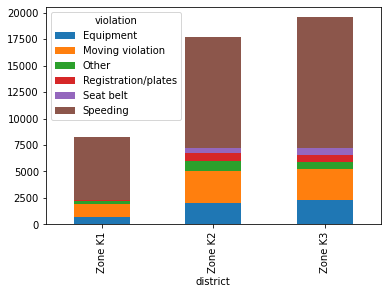

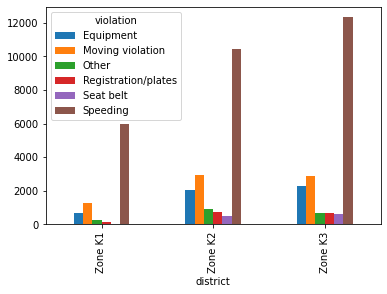

In [74]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri2.district, ri2.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri2.district, ri2.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()